---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Classifier Visualization Playground

The purpose of this notebook is to let you visualize various classsifiers' decision boundaries.

The data used in this notebook is based on the [UCI Mushroom Data Set](http://archive.ics.uci.edu/ml/datasets/Mushroom?ref=datanews.io) stored in `mushrooms.csv`. 

In order to better vizualize the decision boundaries, we'll perform Principal Component Analysis (PCA) on the data to reduce the dimensionality to 2 dimensions. Dimensionality reduction will be covered in a later module of this course.

Play around with different models and parameters to see how they affect the classifier's decision boundary and accuracy!

In [5]:
df = pd.read_csv('mushrooms.csv')
df.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
df2 = pd.get_dummies(df)
df2.head(5)

,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
df3 = df2.sample(frac=0.08)
print(df3.shape)
df3.head()

(650, 119)


,class_e,class_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
3200,1,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
8078,1,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
3847,1,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
7578,0,1,0,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
150,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


<IPython.core.display.Javascript object>


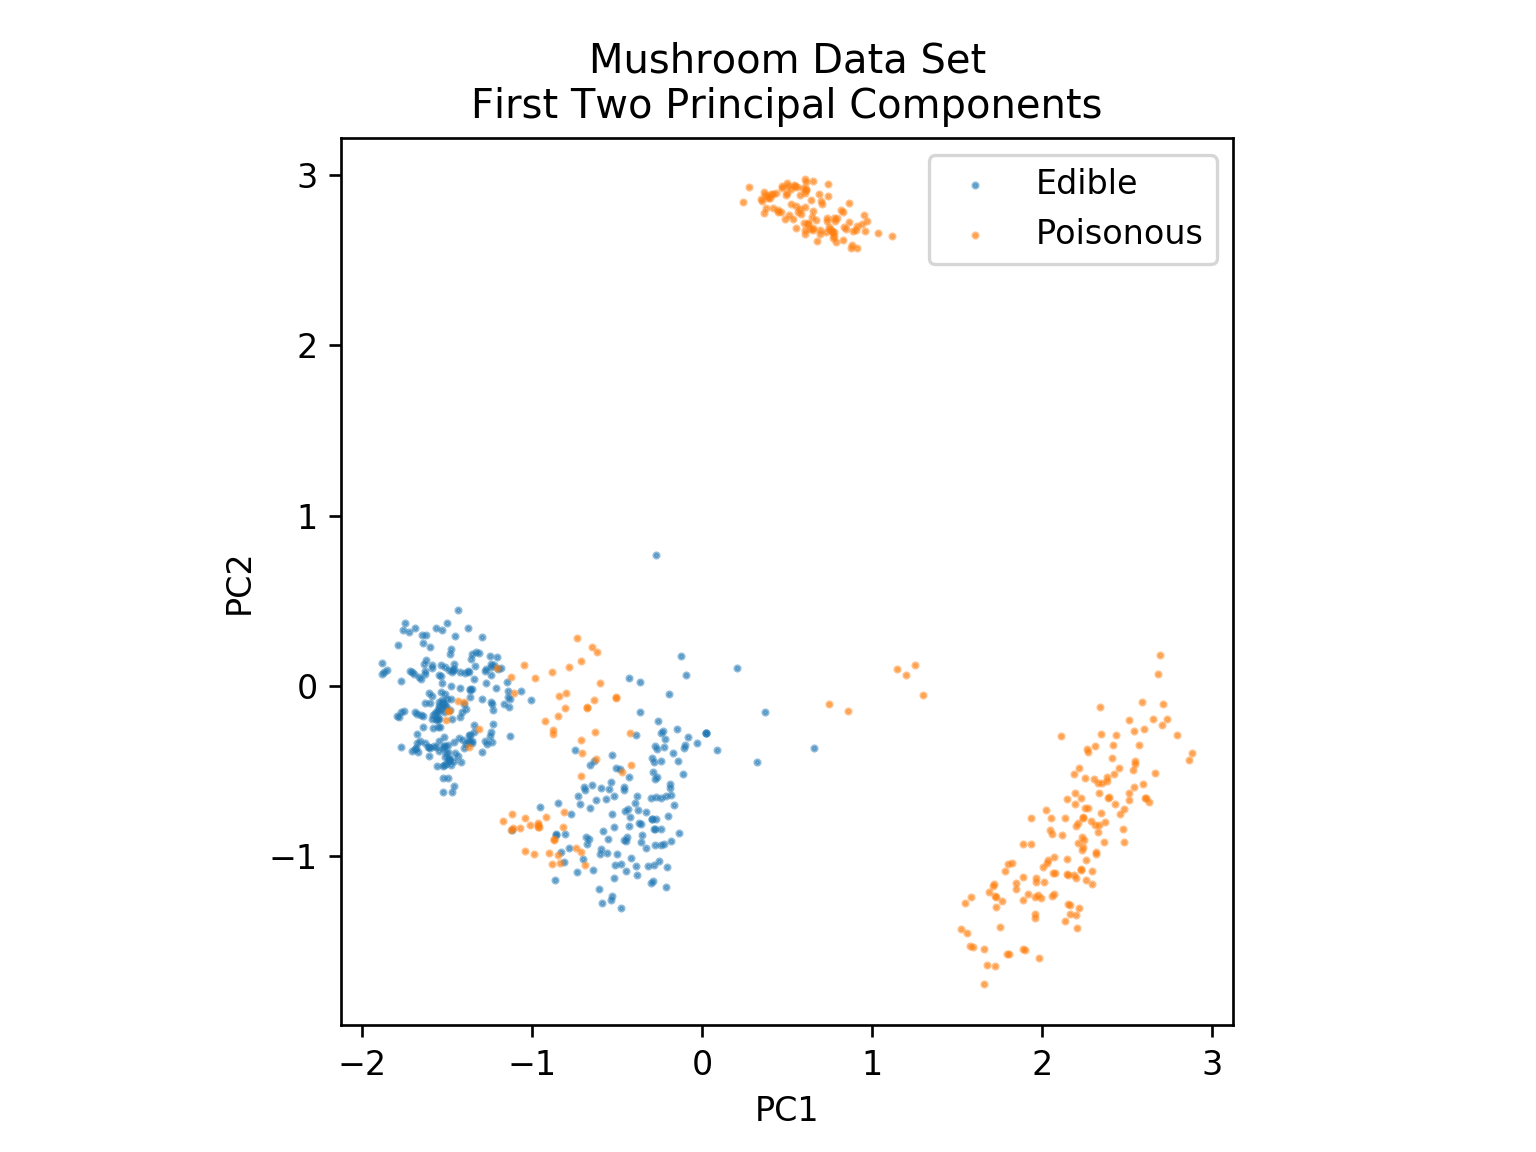

In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# 'mushrooms.csv'包含22个特征和标签，并且全部是字符表示
# 类别属性中e代表蘑菇可食用，p代表蘑菇有毒
df = pd.read_csv('mushrooms.csv')
# 将类别数据转换成one-hot编码
df2 = pd.get_dummies(df)
# 对df2随机抽样8%
df3 = df2.sample(frac=0.08)

X = df3.iloc[:,2:]
y = df3.iloc[:,1]

# 将特征降维
pca = PCA(n_components=2).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(pca, y, random_state=0)


plt.figure(dpi=120)
# y.values==0, 0是一个二维索引，第一个是bool型，第二个是0
plt.scatter(pca[y.values==0,0], pca[y.values==0,1], alpha=0.5, label='Edible', s=2)
plt.scatter(pca[y.values==1,0], pca[y.values==1,1], alpha=0.5, label='Poisonous', s=2)
plt.legend()
plt.title('Mushroom Data Set\nFirst Two Principal Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.gca().set_aspect('equal')

In [9]:
pca.shape

(650, 2)

In [14]:
y.values == 0, 0

(array([False, False,  True, False, False, False,  True,  True,  True,
        False,  True, False,  True,  True,  True, False,  True,  True,
         True, False, False, False, False,  True,  True,  True,  True,
         True,  True, False, False,  True,  True, False,  True, False,
        False,  True,  True,  True,  True, False,  True, False,  True,
         True,  True, False,  True, False,  True, False, False,  True,
         True,  True,  True, False, False, False, False, False,  True,
         True, False, False, False,  True, False, False, False,  True,
        False, False,  True, False, False, False, False,  True,  True,
        False, False, False,  True, False, False,  True, False, False,
         True,  True,  True,  True,  True, False,  True, False,  True,
        False,  True, False, False,  True,  True, False, False, False,
         True,  True,  True,  True,  True, False, False,  True,  True,
         True, False,  True, False, False,  True,  True,  True, False,
      

In [15]:
def plot_mushroom_boundary(X, y, fitted_model):

    plt.figure(figsize=(9.8,5), dpi=100)
    
    for i, plot_type in enumerate(['Decision Boundary', 'Decision Probabilities']):
        plt.subplot(1,2,i+1)

        mesh_step_size = 0.01  # step size in the mesh
        x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
        y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size), np.arange(y_min, y_max, mesh_step_size))
        if i == 0:
            Z = fitted_model.predict(np.c_[xx.ravel(), yy.ravel()])
        else:
            try:
                Z = fitted_model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
            except:
                plt.text(0.4, 0.5, 'Probabilities Unavailable', horizontalalignment='center',
                     verticalalignment='center', transform = plt.gca().transAxes, fontsize=12)
                plt.axis('off')
                break
        Z = Z.reshape(xx.shape)
        plt.scatter(X[y.values==0,0], X[y.values==0,1], alpha=0.4, label='Edible', s=5)
        plt.scatter(X[y.values==1,0], X[y.values==1,1], alpha=0.4, label='Posionous', s=5)
        plt.imshow(Z, interpolation='nearest', cmap='RdYlBu_r', alpha=0.15, 
                   extent=(x_min, x_max, y_min, y_max), origin='lower')
        plt.title(plot_type + '\n' + 
                  str(fitted_model).split('(')[0]+ ' Test Accuracy: ' + str(np.round(fitted_model.score(X, y), 5)))
        plt.gca().set_aspect('equal');
        
    plt.tight_layout()
    plt.subplots_adjust(top=0.9, bottom=0.08, wspace=0.02)

0.9014373716632443
0.8711656441717791


/Users/zhujun/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


<IPython.core.display.Javascript object>


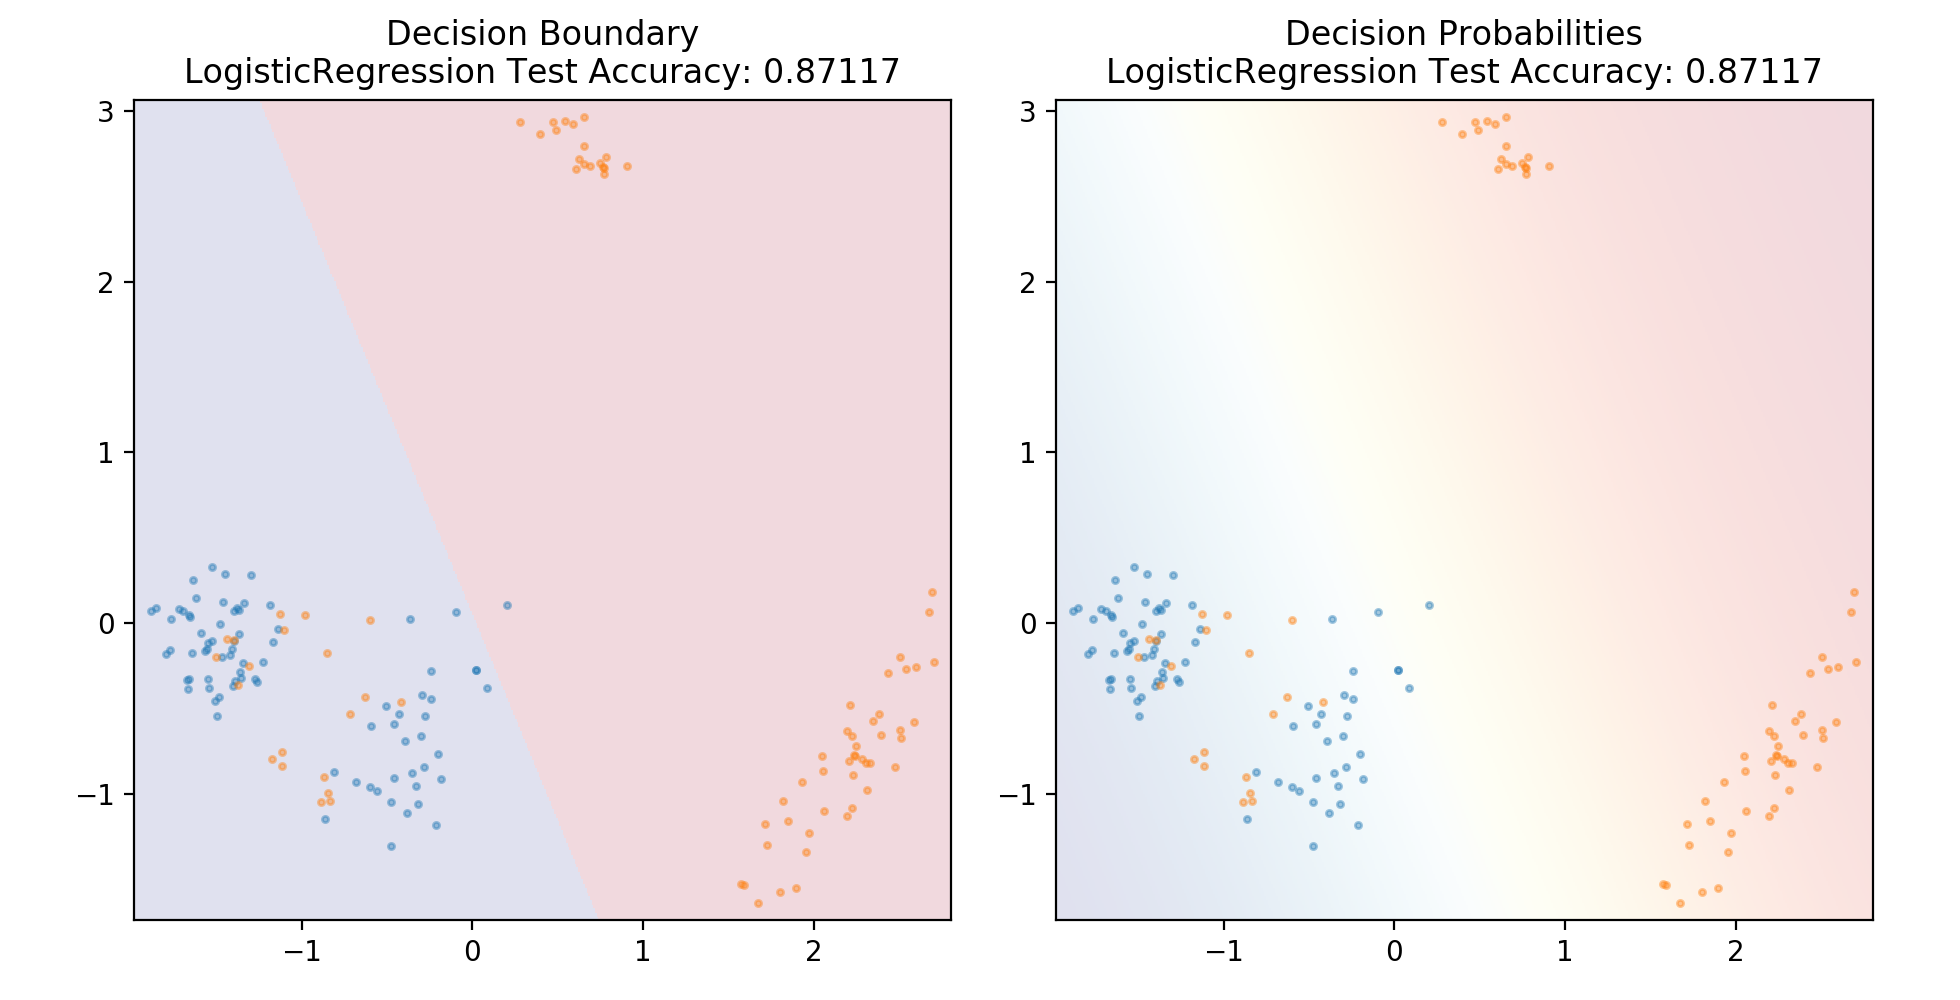

In [55]:
from sklearn.linear_model import LogisticRegression

# 当模型过拟合时，增强正则化效果，增大alpha，减小C，模型会更简单；
# 当模型欠拟合时，减小正则化效果，减小alpha，增大C，模型会更复杂；
model = LogisticRegression(C=0.01)
model.fit(X_train,y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
plot_mushroom_boundary(X_test, y_test, model)

0.9507186858316222
0.9263803680981595


<IPython.core.display.Javascript object>


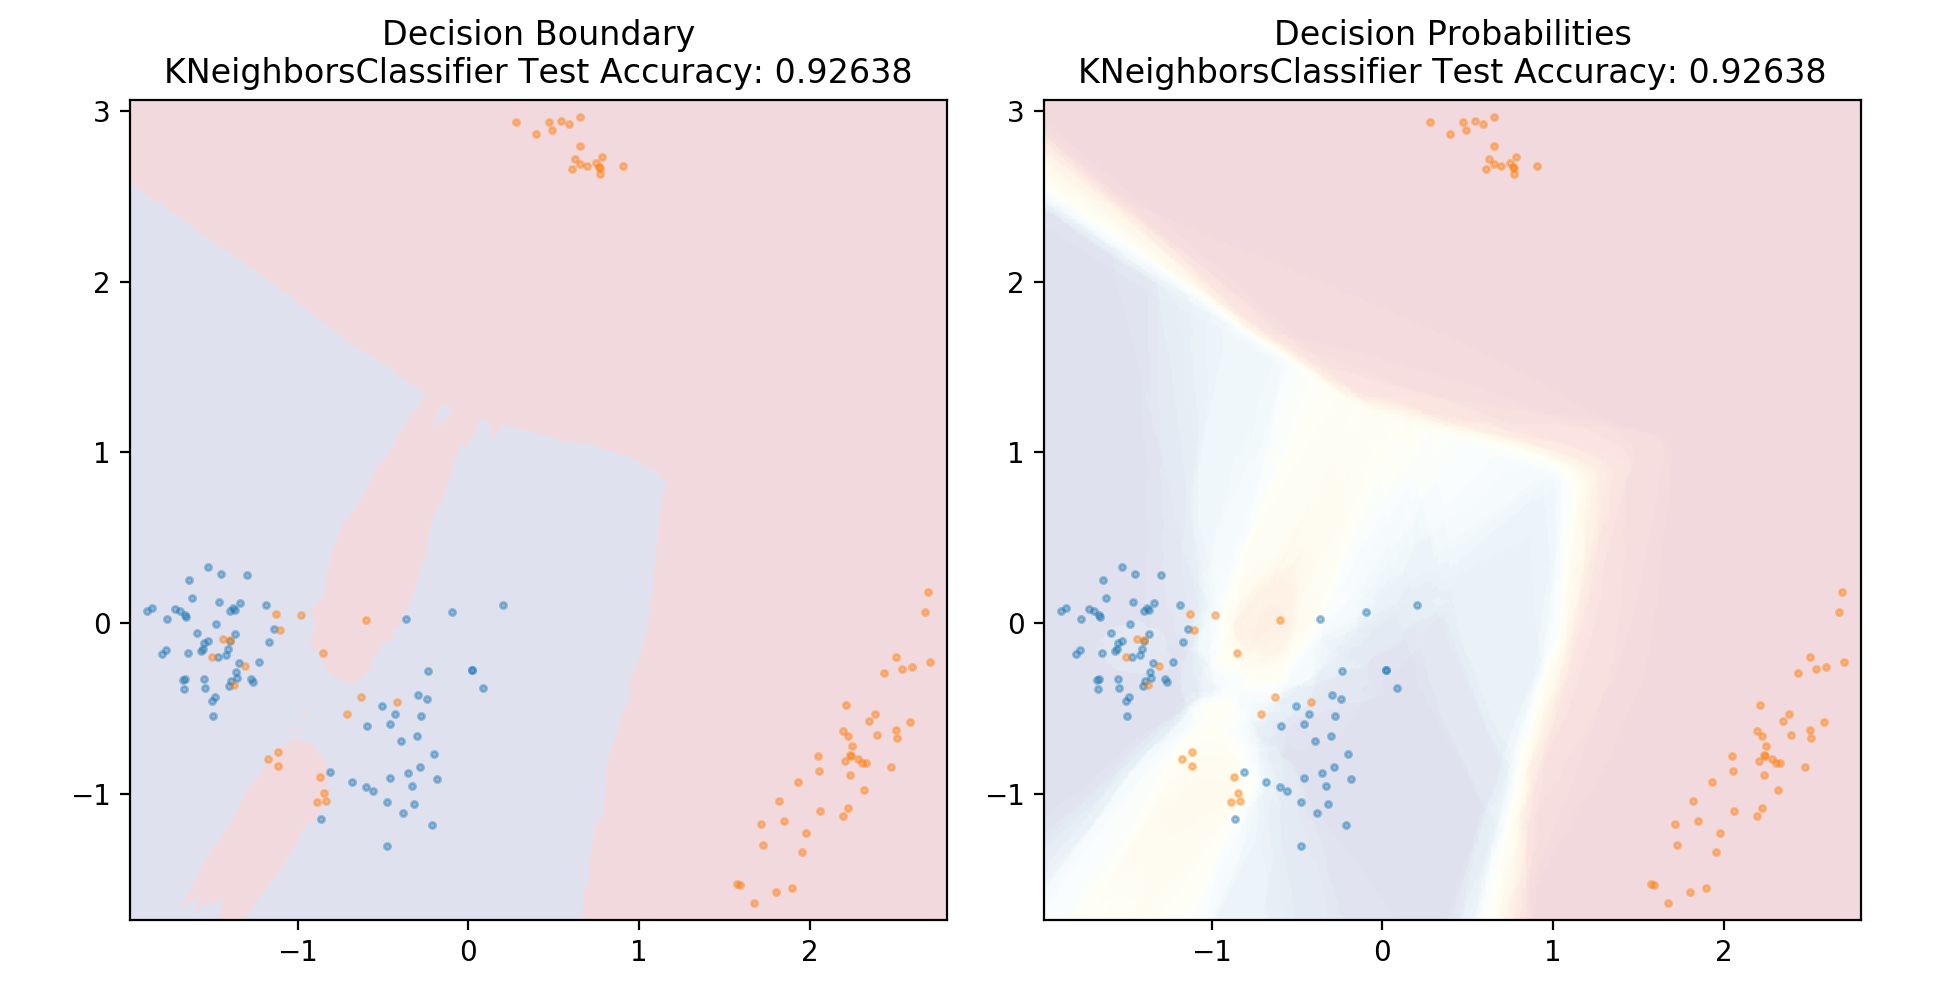

In [69]:
from sklearn.neighbors import KNeighborsClassifier

# 增大k值，会使得模型更简单，一般泛化能力更高，但是容易欠拟合，用于过拟合的情况；
# 减小k值，会使得模型更复杂，但是容易过拟合，用于欠拟合的情况；
model = KNeighborsClassifier(n_neighbors=30)
model.fit(X_train,y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
plot_mushroom_boundary(X_test, y_test, model)

0.9281314168377823
0.9202453987730062


<IPython.core.display.Javascript object>


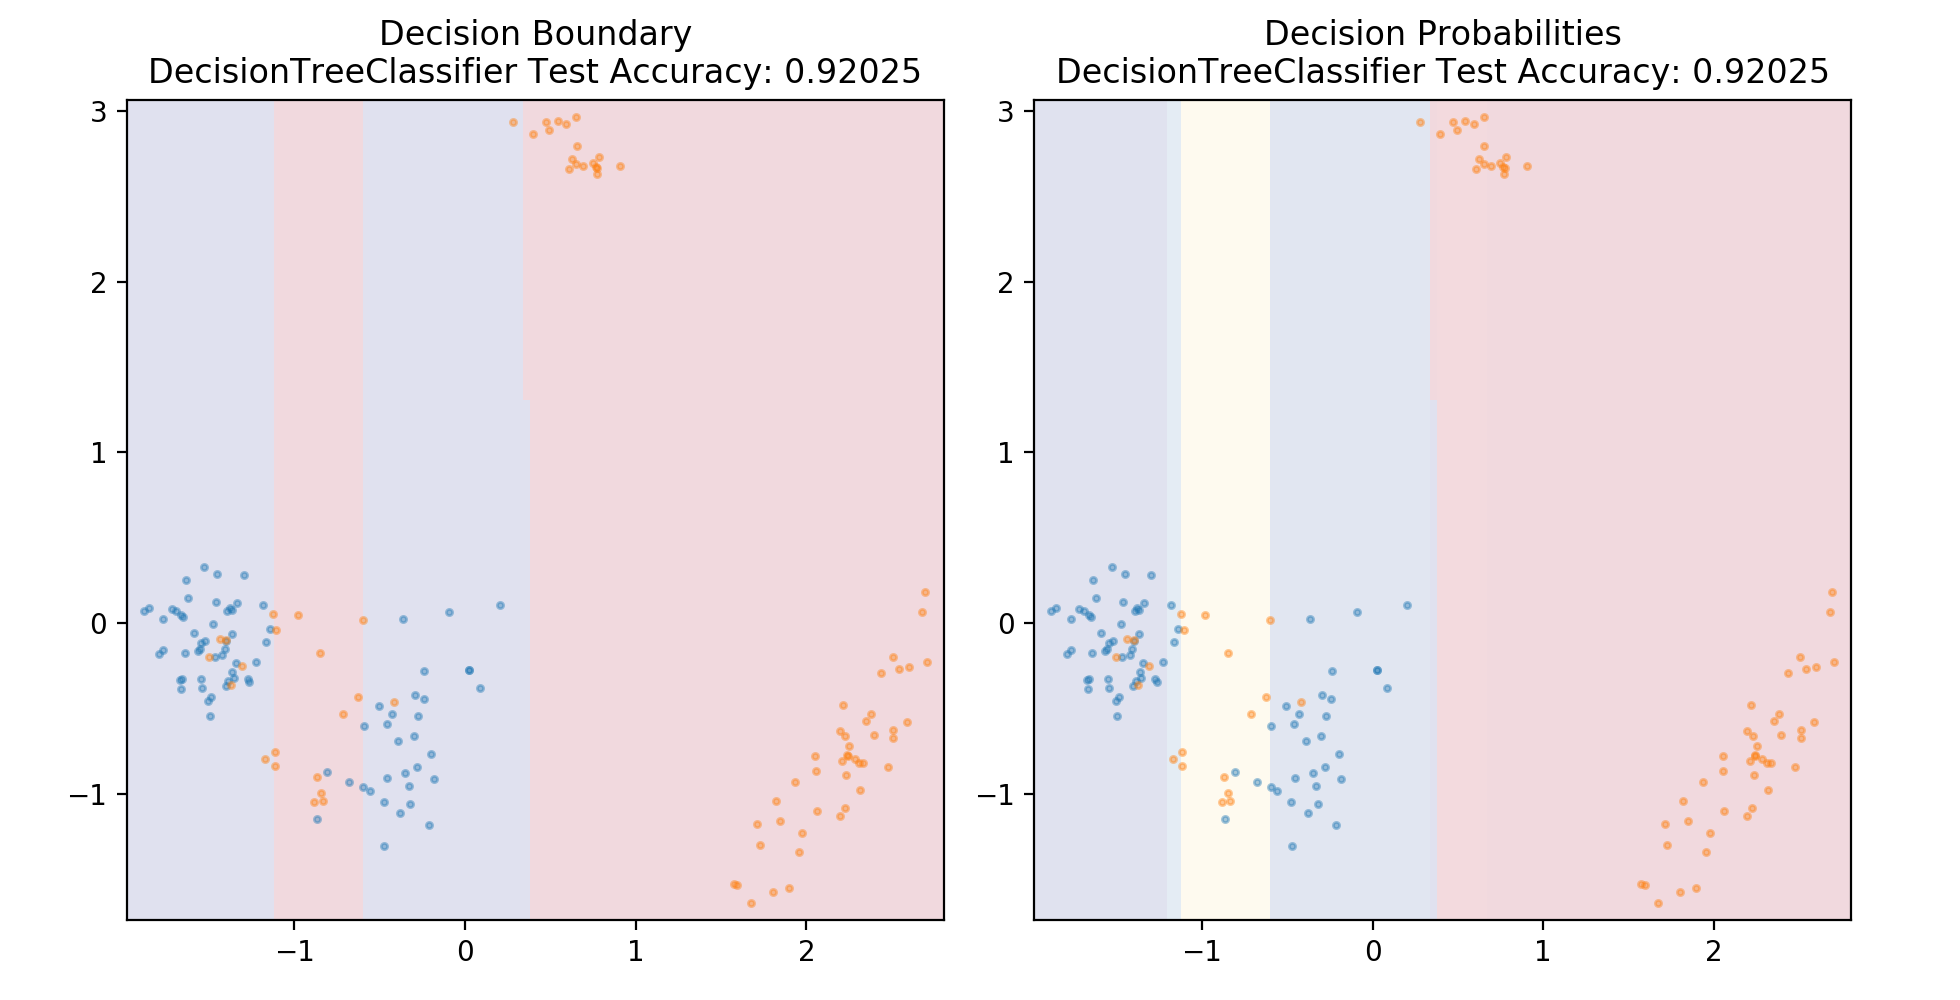

In [77]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
plot_mushroom_boundary(X_test, y_test, model)

1.0
0.8957055214723927


<IPython.core.display.Javascript object>


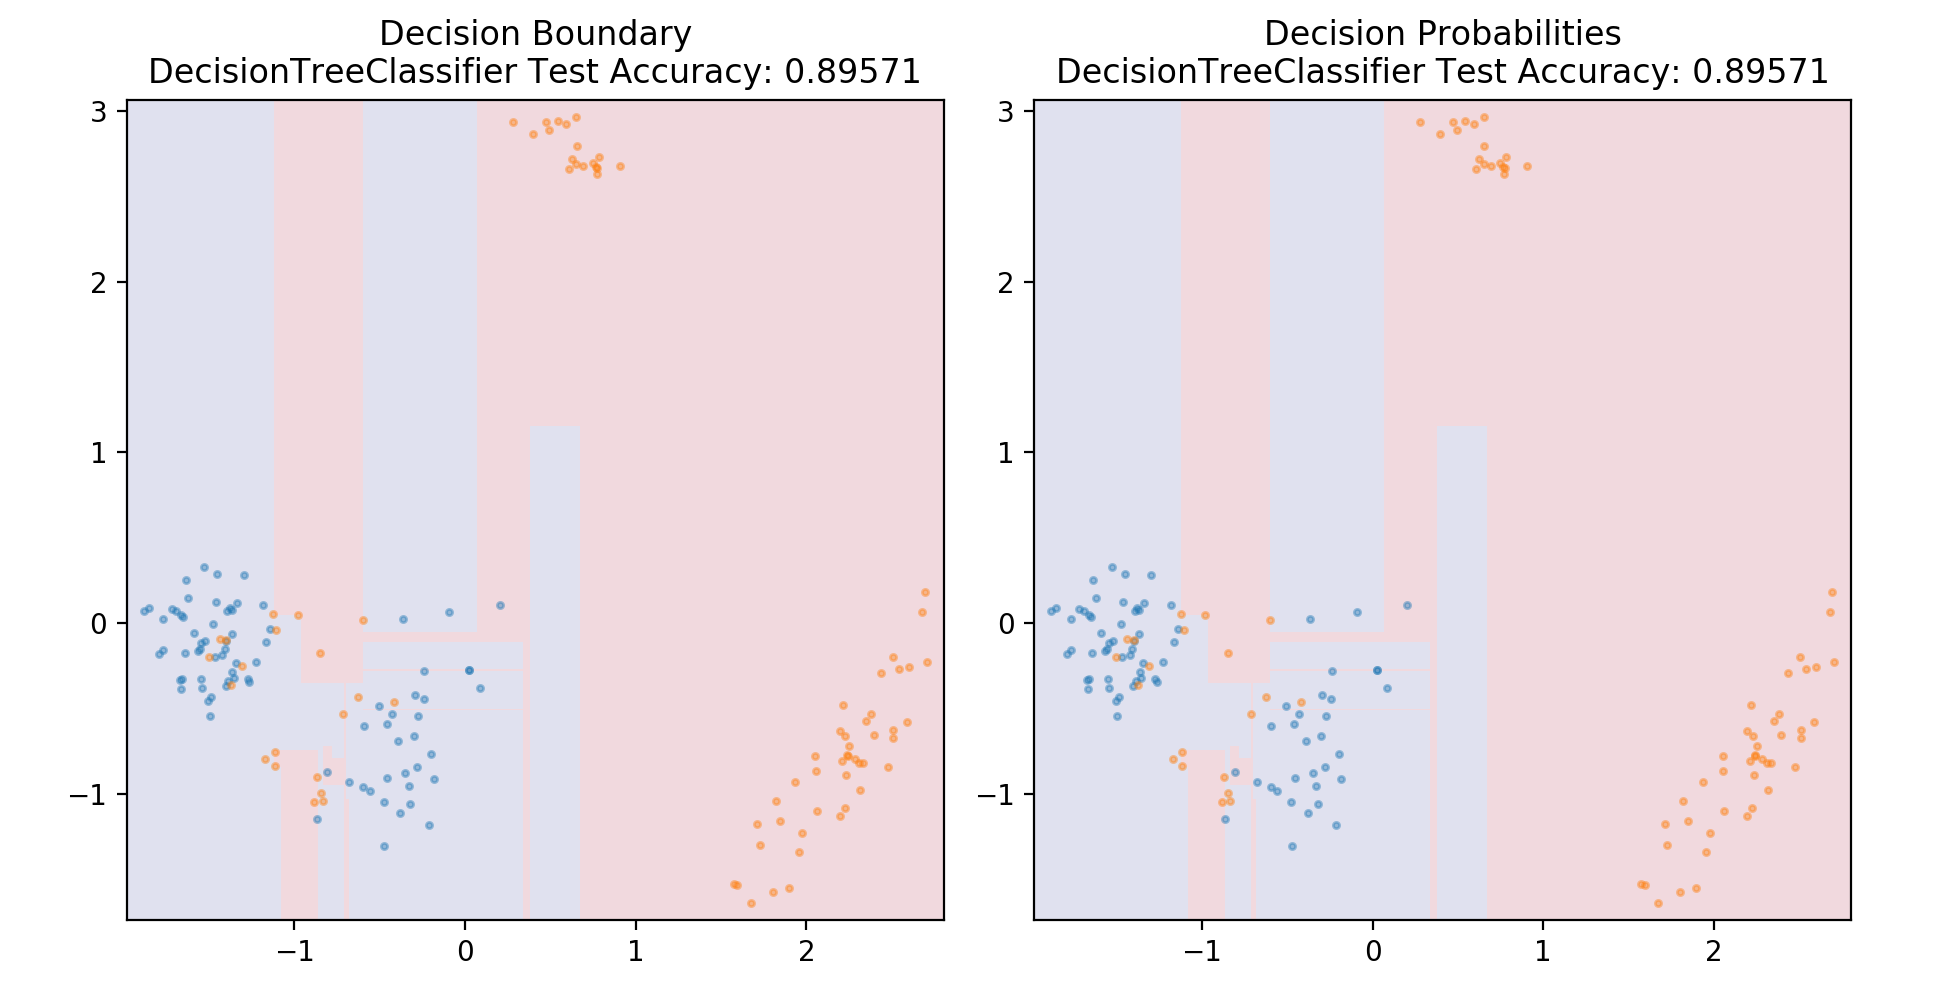

In [79]:
from sklearn.tree import DecisionTreeClassifier

# 这种情况下，决策树模型过拟合了，应调整max_depth, min_samples_leaf, max_leaf_nodes
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
plot_mushroom_boundary(X_test, y_test, model)

0.9856262833675564
0.9141104294478528


/Users/zhujun/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<IPython.core.display.Javascript object>


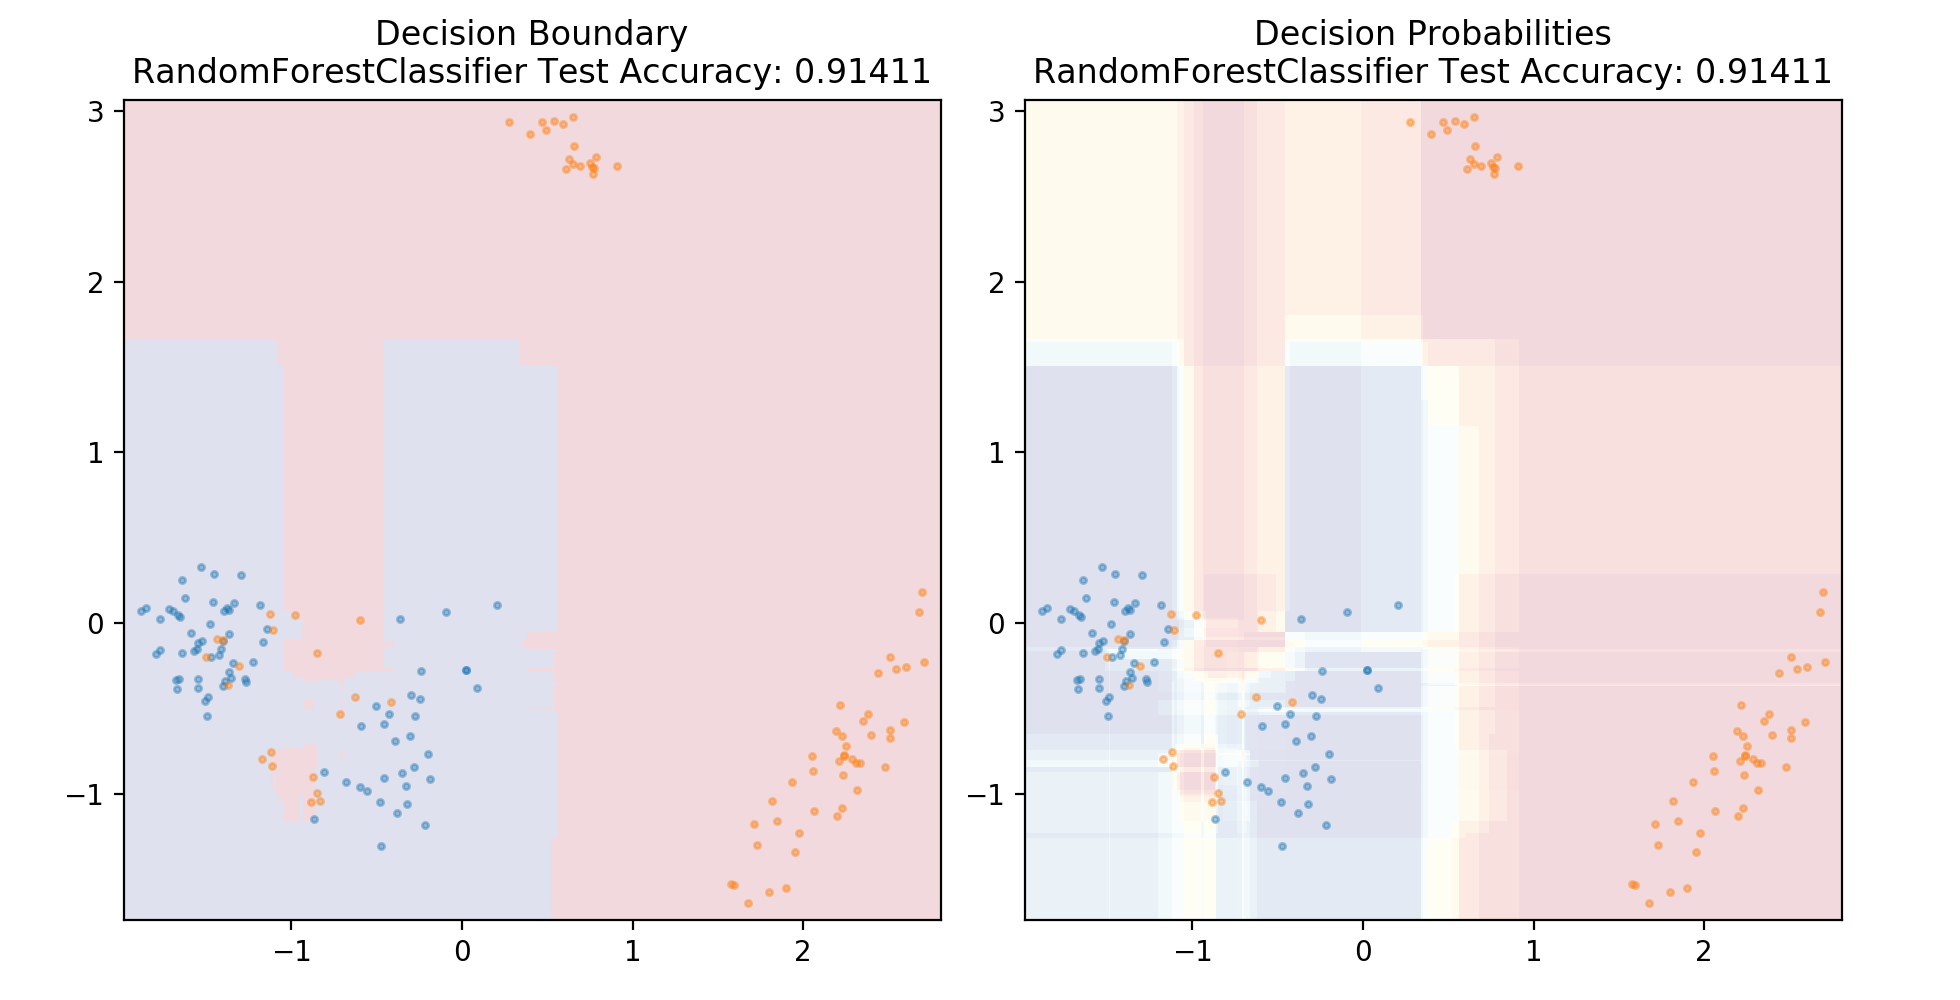

In [89]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=8)
model.fit(X_train,y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
plot_mushroom_boundary(X_test, y_test, model)

0.9055441478439425
0.8773006134969326


<IPython.core.display.Javascript object>


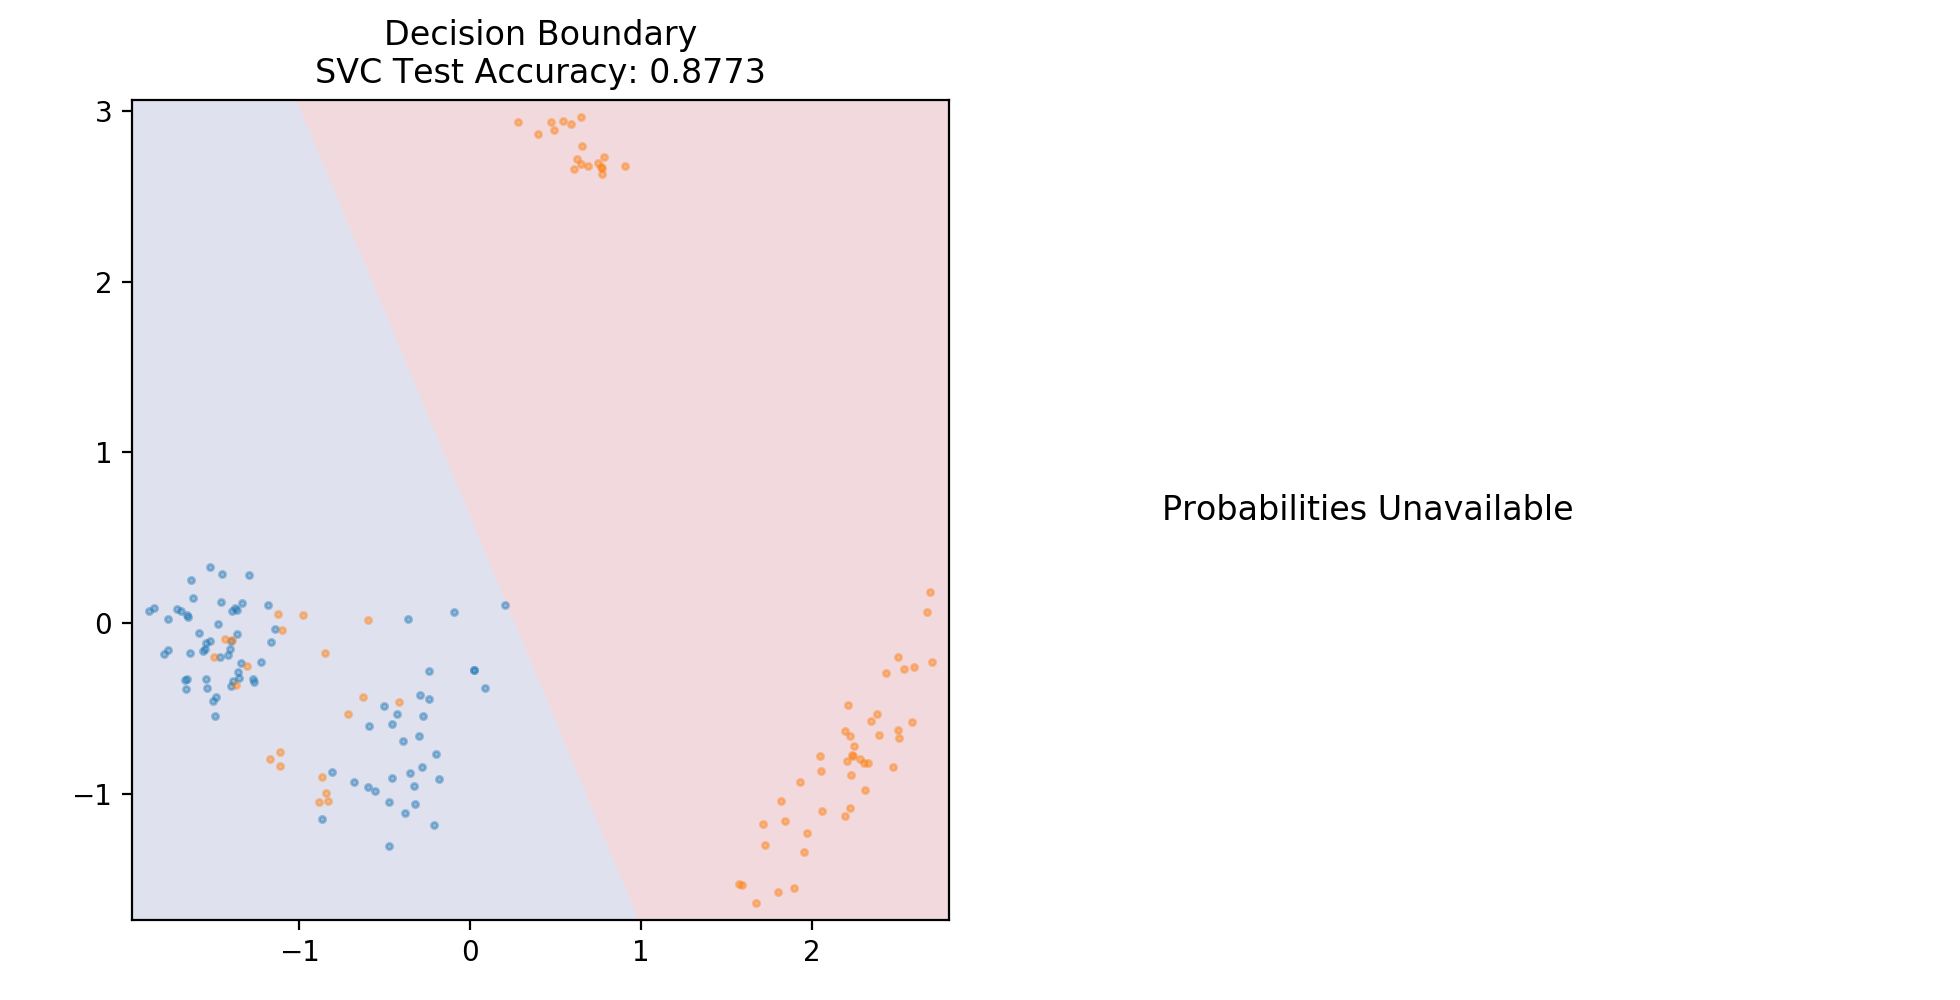

In [101]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=0.01)
model.fit(X_train,y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
plot_mushroom_boundary(X_test, y_test, model)

0.9630390143737166
0.9325153374233128


<IPython.core.display.Javascript object>


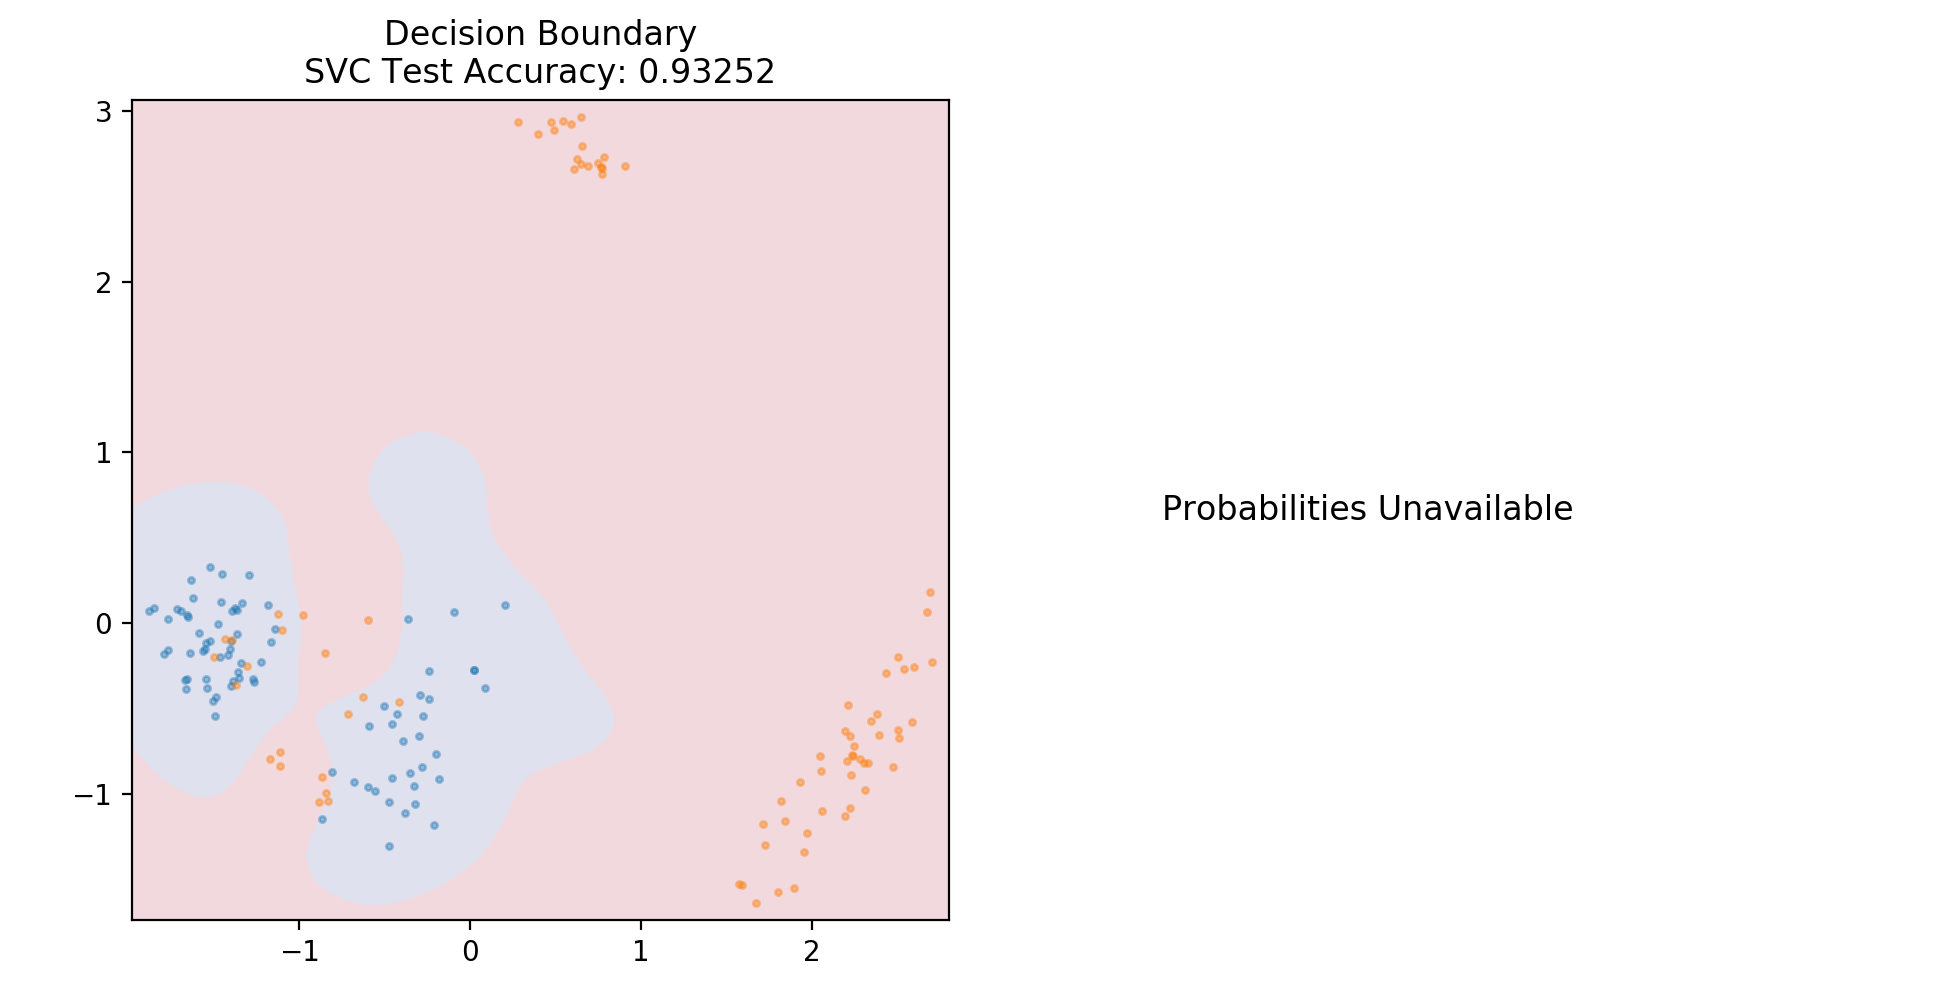

In [132]:
from sklearn.svm import SVC

# 先调整gamma至过拟合，再微调gamma和C寻找最优解
model = SVC(kernel='rbf', C=0.6, gamma=10)
model.fit(X_train,y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
plot_mushroom_boundary(X_test, y_test, model)

0.9548254620123203
0.9263803680981595


/Users/zhujun/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


<IPython.core.display.Javascript object>


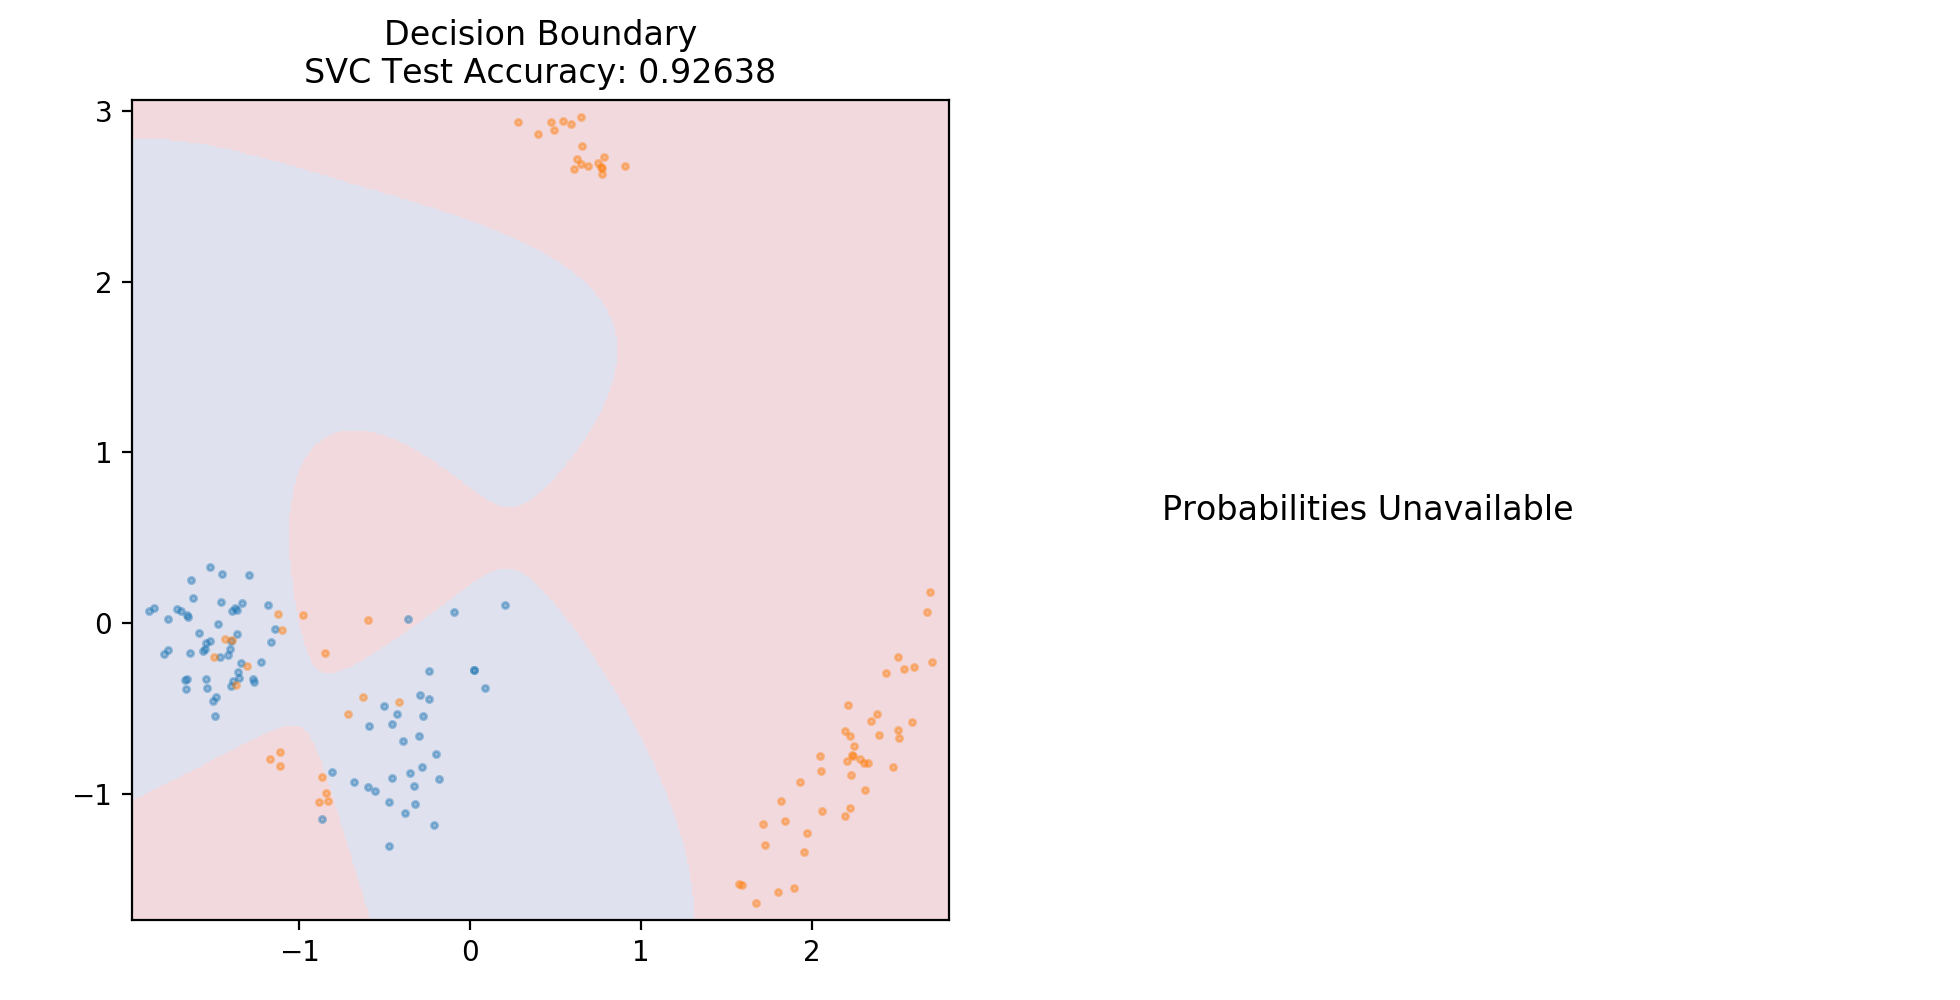

In [134]:
from sklearn.svm import SVC

model = SVC(kernel='rbf', C=10)
model.fit(X_train,y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
plot_mushroom_boundary(X_test, y_test, model)

0.9014373716632443
0.8711656441717791


<IPython.core.display.Javascript object>


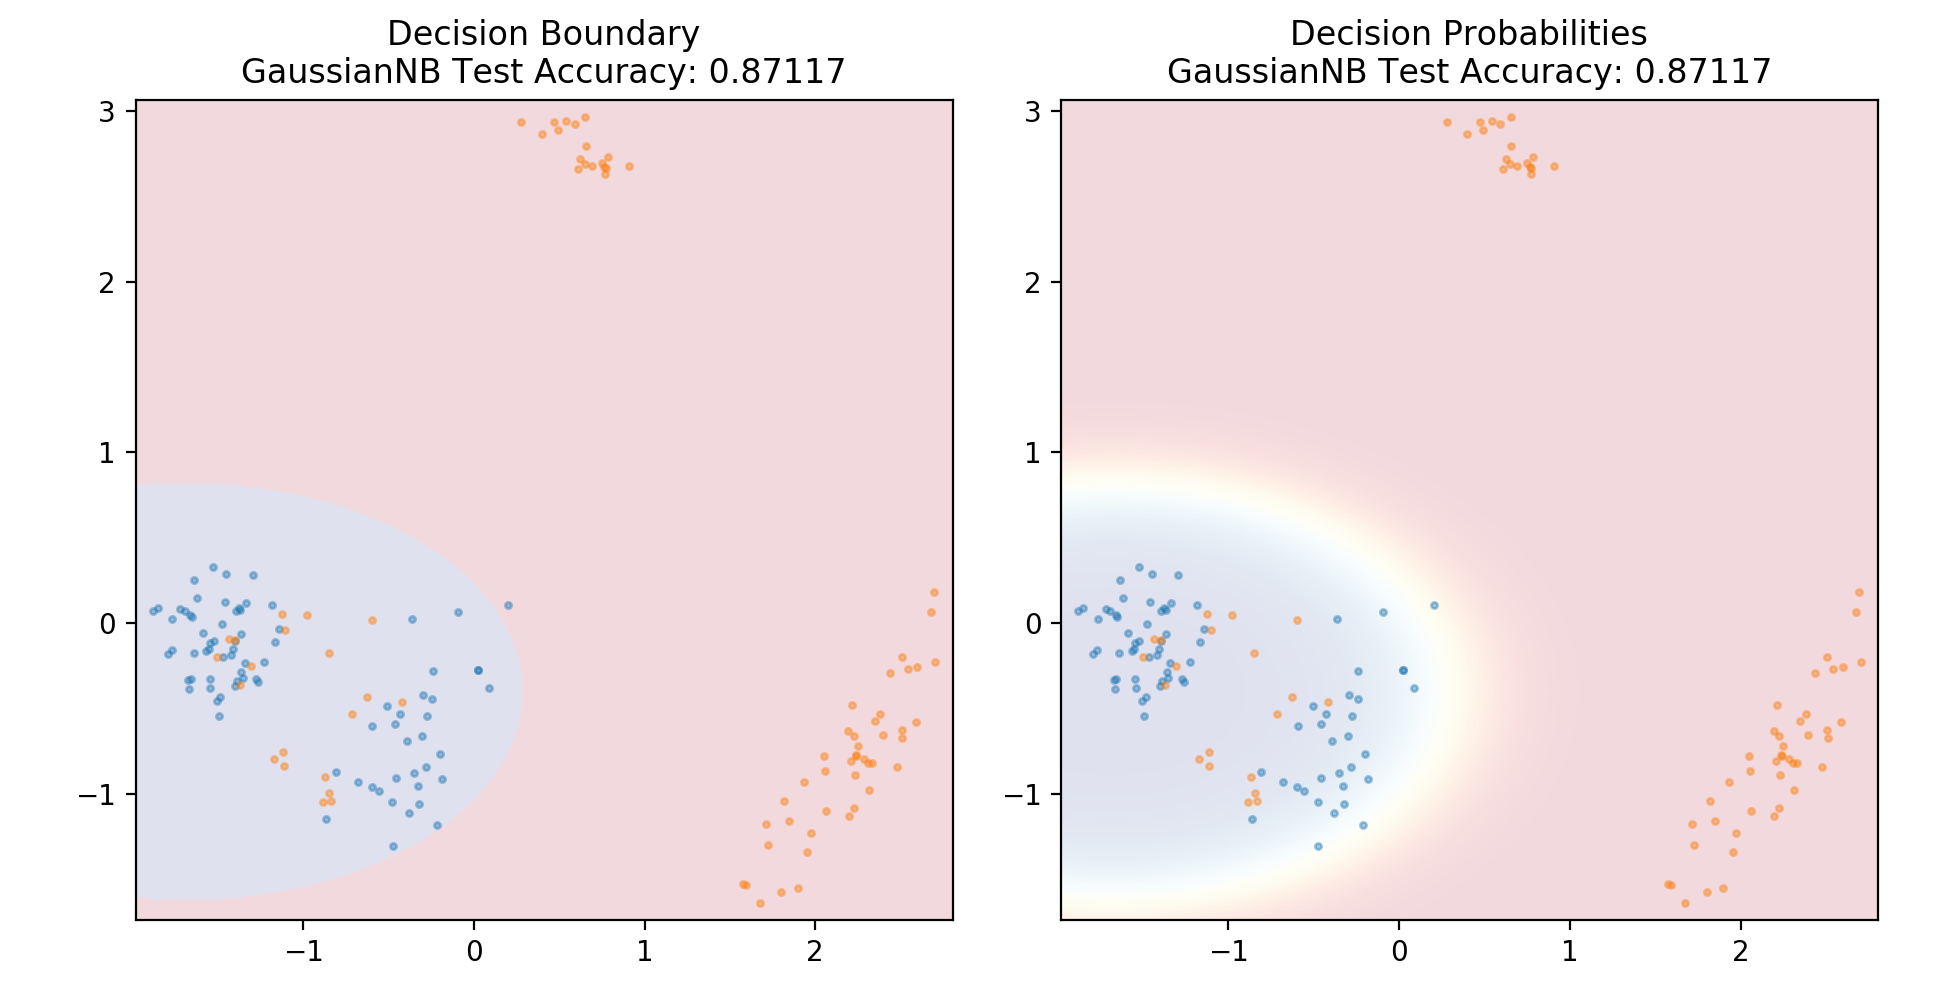

In [135]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train,y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
plot_mushroom_boundary(X_test, y_test, model)

0.9630390143737166
0.9141104294478528


<IPython.core.display.Javascript object>


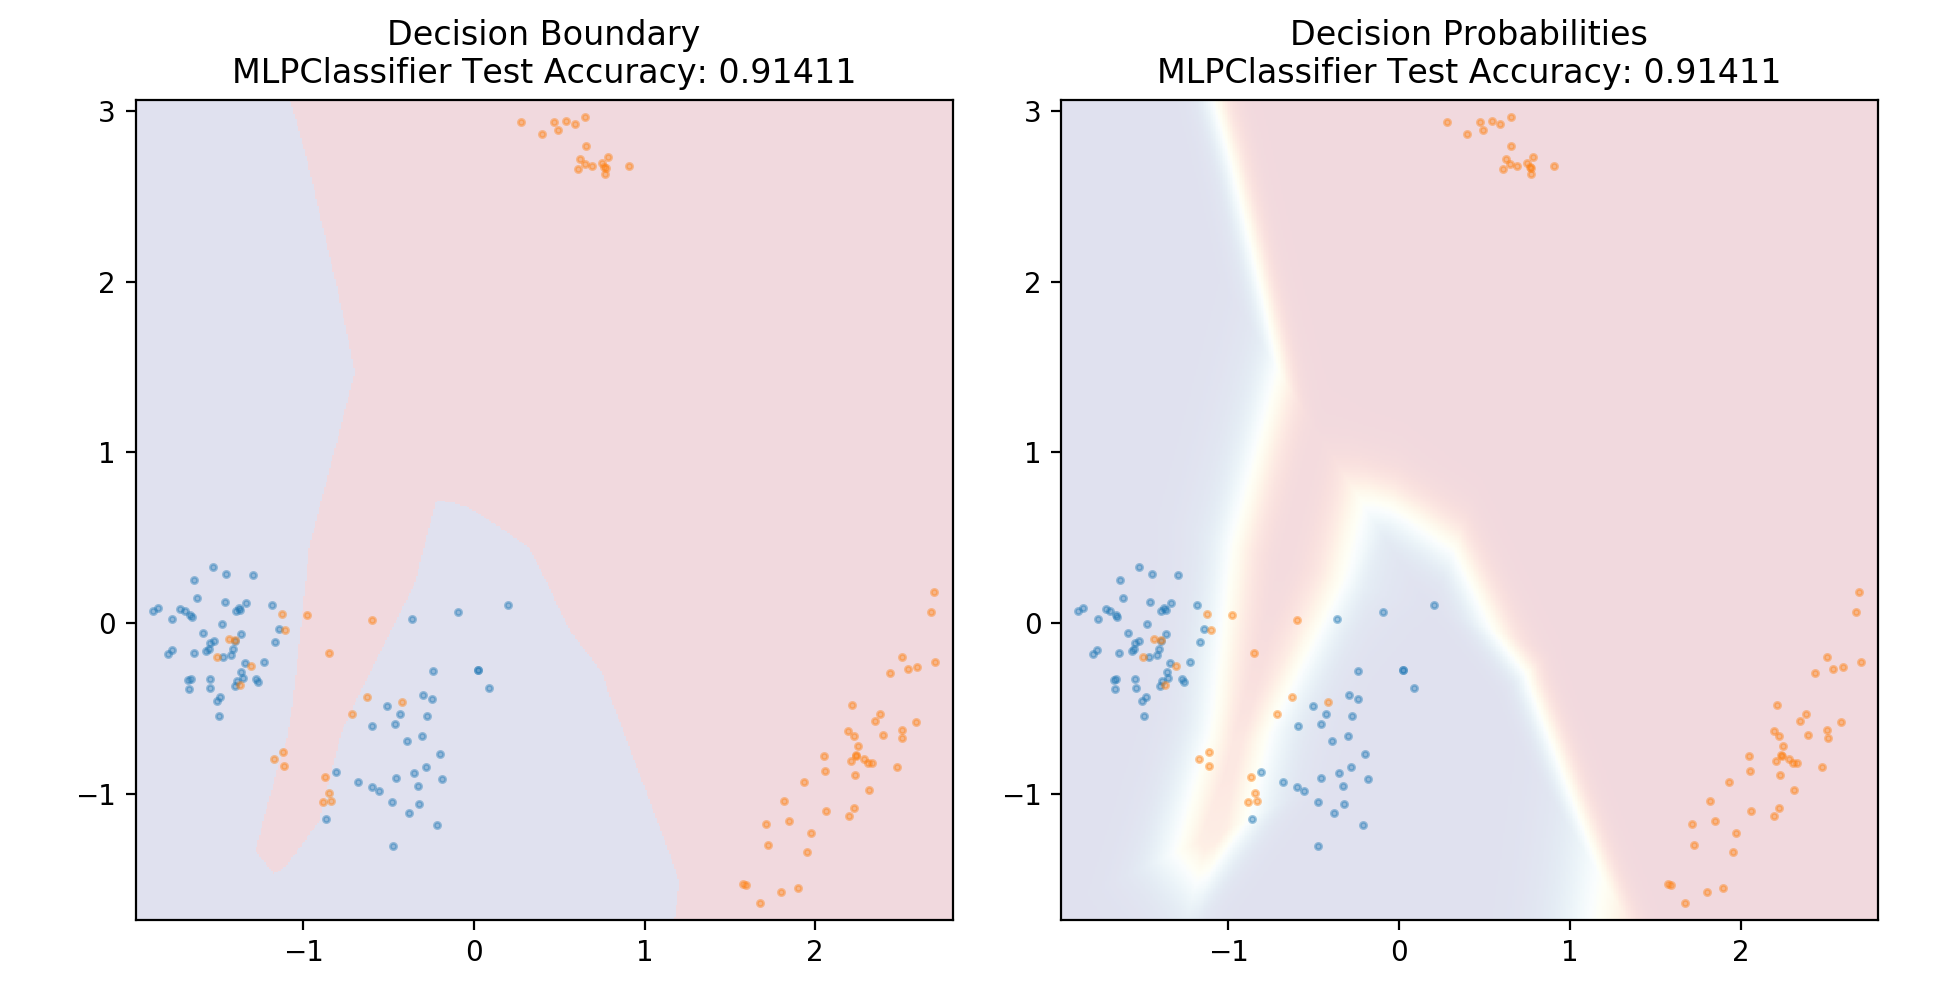

In [160]:
from sklearn.neural_network import MLPClassifier

# 隐藏层单元数，bacth_size，max_iter
model = MLPClassifier(hidden_layer_sizes=(8, 8, 16), batch_size=128, max_iter=1000)
model.fit(X_train,y_train)

print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
plot_mushroom_boundary(X_test, y_test, model)